# EDA for credit card transactions

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pyrsm as rsm

In [2]:
data = pd.read_csv('card transactions.csv')
data.head(5)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
data=data.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', ], axis = 1)

In [3]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
Unnamed: 10          float64
Unnamed: 11          float64
Unnamed: 12          float64
Unnamed: 13          float64
Unnamed: 14          float64
Unnamed: 15          float64
Unnamed: 16          float64
Unnamed: 17          float64
dtype: object

## Cardnum

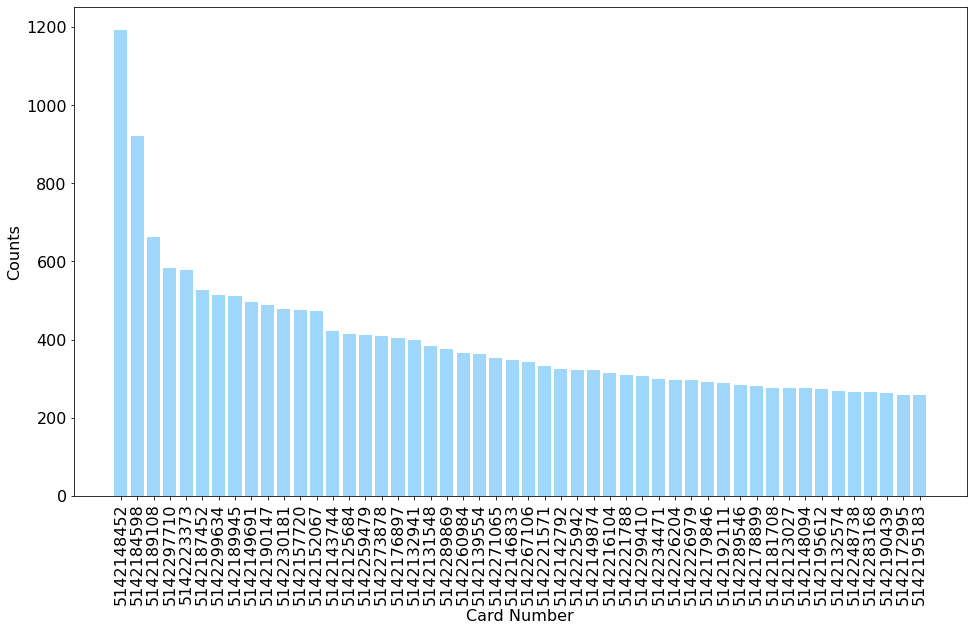

In [4]:
plt.figure(figsize = (16, 9))
card = pd.DataFrame(data.Cardnum.value_counts(ascending=False)[:50]).reset_index()
card['index'] = card['index'].astype('str')
plt.bar(card['index'], card.Cardnum, color='lightskyblue', alpha=0.8, width=0.8)
plt.xticks(rotation = 90, size = 16)
plt.yticks(size = 16)
plt.ylabel('Counts', size = 16)
plt.xlabel('Card Number', size = 16)
#cplt.yscale('log')
#plt.title('Top 50 Card Number in Transaction Frequency in 2010')
plt.grid(False)
#plt.savefig('top 50 card number.png', bbox_inches = 'tight')

In [51]:
count_cardnum = pd.DataFrame(data.Cardnum.value_counts(ascending=False)).reset_index()
count_cardnum.columns = ['cardnum', 'counts']

<Figure size 1440x648 with 0 Axes>

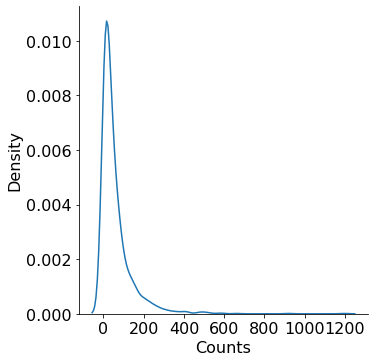

In [52]:
plt.figure(figsize = (20, 9))
sns.displot(count_cardnum, x="counts", kind="kde")
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Counts', size = 16)
#plt.savefig('cardnum count density.png', bbox_inches = 'tight')

## Date

### Month

In [5]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].dt.strftime("%m/%d/%Y")
data['month'] = pd.DatetimeIndex(data['Date']).month
data['weekday'] = pd.DatetimeIndex(data['Date']).weekday

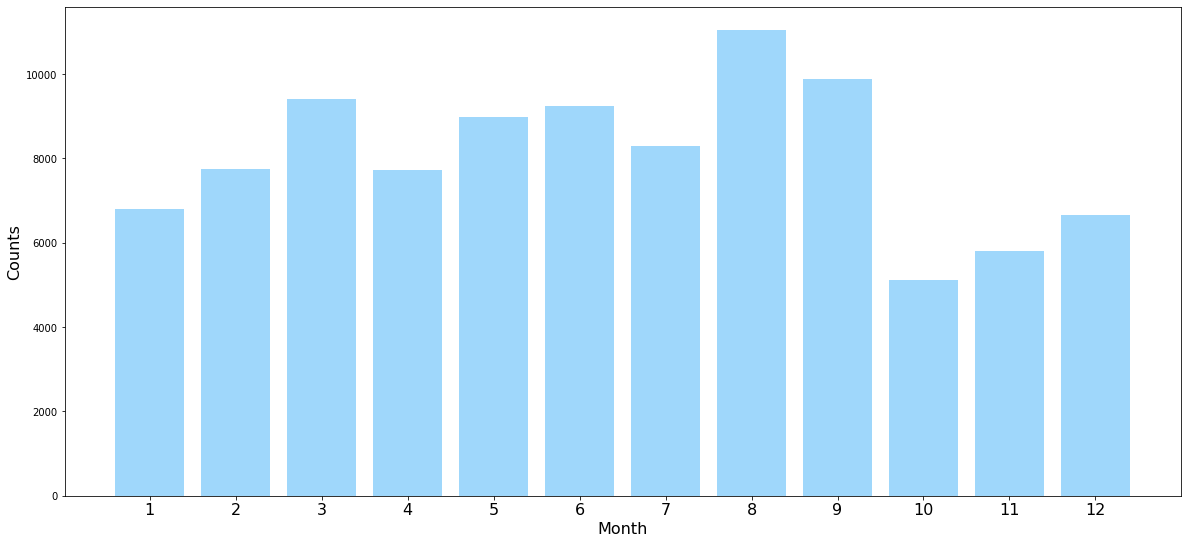

In [53]:
plt.figure(figsize = (20, 9))
month = pd.DataFrame(data['month'].value_counts()).reset_index()
plt.bar(month['index'], month['month'], color='lightskyblue', alpha=0.8)
plt.xticks(list(range(1,13)), size = 16)
plt.xticks(size = 16)
plt.ylabel('Counts', size = 16)
plt.xlabel('Month', size = 16)

#plt.title('Number of Transactions in Each Month in 2010')
plt.grid(False)

### Weekdays

In [8]:
data['weekday_'] = rsm.ifelse(data.weekday == 0, 'Mon',
                         rsm.ifelse(data.weekday==1, 'Tue',
                                   rsm.ifelse(data.weekday==2, 'Wed',
                                             rsm.ifelse(data.weekday==3, 'Thur',
                                                       rsm.ifelse(data.weekday==5, 'Fri',
                                                                 rsm.ifelse(data.weekday==6, 'Sat', 'Sun'))))))

In [9]:
data['weekday_'] = data['weekday_'].astype('category')
data['weekday_'] = data['weekday_'].cat.reorder_categories(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])

In [12]:
weekday_num = pd.DataFrame(data.groupby('weekday_').size()).reset_index()
weekday_num.columns = ['weekday', 'counts']

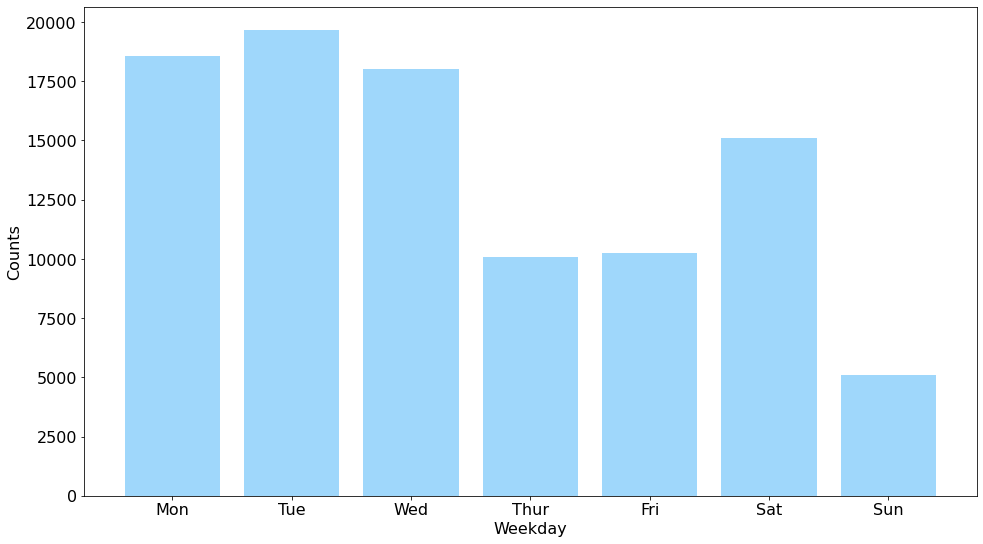

In [13]:
plt.figure(figsize = (16, 9))
plt.bar( weekday_num['weekday'], weekday_num.counts, color='lightskyblue', alpha=0.8)
plt.xticks(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], size = 16)
plt.yticks(size = 16)
plt.ylabel('Counts', size = 16)
plt.xlabel('Weekday', size = 16)
#plt.yscale('log')
#plt.title('Number of Transactions in Weekdays in 2010')
plt.grid(False)
#plt.savefig('weekday distribution.png', bbox_inches = 'tight')

## Merchnum
### (top 50)

In [14]:
top_merchnum = pd.DataFrame(data['Merchnum'].value_counts()).reset_index()
top_merchnum50 = top_merchnum.sort_values(by='Merchnum', ascending = False)[:50]

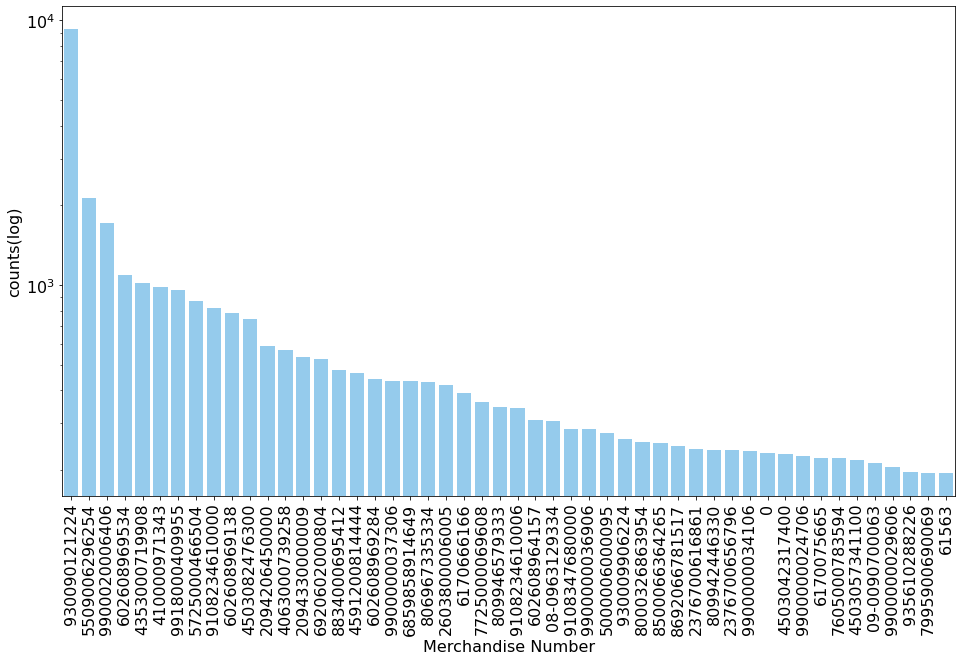

In [15]:
plt.figure(figsize=(16, 9))
sns.barplot(data=top_merchnum50, x='index', y='Merchnum', palette=['lightskyblue']).set_xticklabels(labels=top_merchnum50['index'], rotation=90, size=8)
plt.grid(False)
plt.xlabel('Merchandise Number', fontsize=16)
plt.ylabel('counts(log)', size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.yscale('log')
#plt.title("Top 50 Frequent Merchandise Numbers", fontsize=14)
#plt.savefig('top merchnum.png', bbox_inches = 'tight')

## Merch description
### (frequency > 200)

In [16]:
import re

In [17]:
pattern=r'FEDEX SHP \d\d/\d\d/\d\d\s\w\w\W'
description = []
for i in range(len(data)):
    try:
        new_desc = re.sub(pattern,'FEDEX SHP', data['Merch description'][i])
    except:
        new_desc = i
        
    description.append(new_desc)

In [18]:
data['descpt'] = description

In [21]:
top_merch = pd.DataFrame(data['descpt'].value_counts()).reset_index()
merch200 = top_merch[top_merch['descpt']>200]

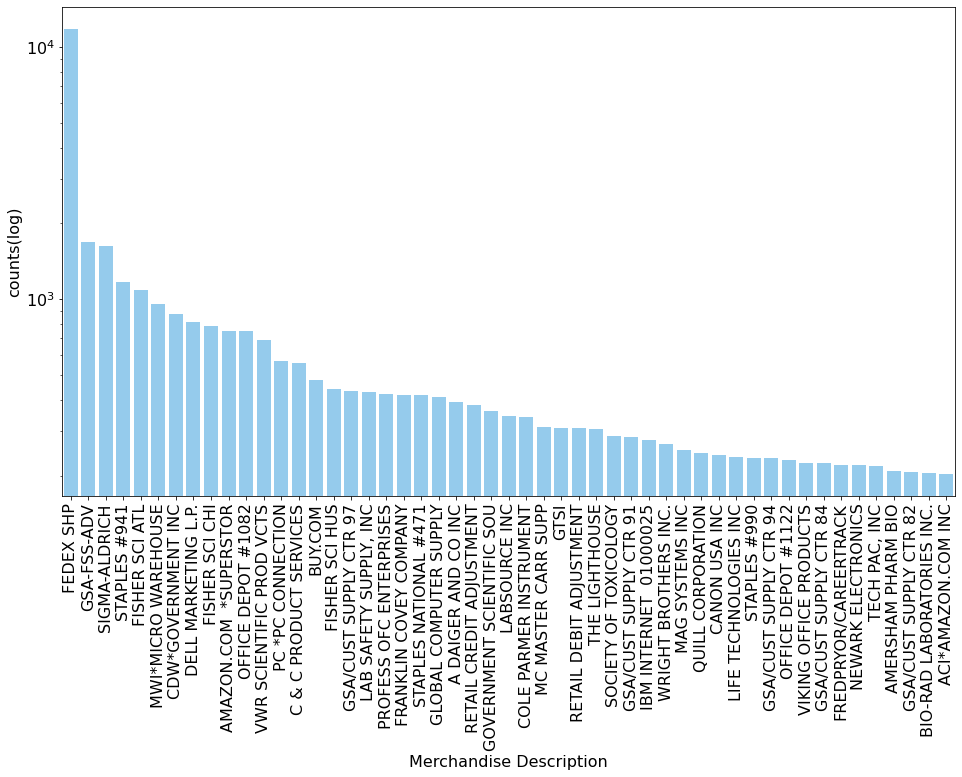

In [22]:
plt.figure(figsize=(16, 9))
g = sns.barplot(data=merch200, x='index', y='descpt', palette=['lightskyblue']).set_xticklabels(labels=merch200['index'], rotation=90, size=8)
plt.grid(False)
plt.xlabel('Merchandise Description', fontsize=16)
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.ylabel('counts(log)', size = 16)
plt.yscale('log')
#plt.title("Top 50 Merchandises in Frequency", fontsize=14)
#plt.savefig('Merch description.png', bbox_inches='tight')

## Merch State

In [32]:
top_states = pd.DataFrame(data['Merch state'].value_counts()).reset_index()

In [33]:
other_states = top_states['Merch state'][50:].sum()
other_states

273

In [34]:
other = pd.DataFrame([['other', 273]])
other.columns = top_states.columns
top_states = top_states[:50].append(other, ignore_index=True)

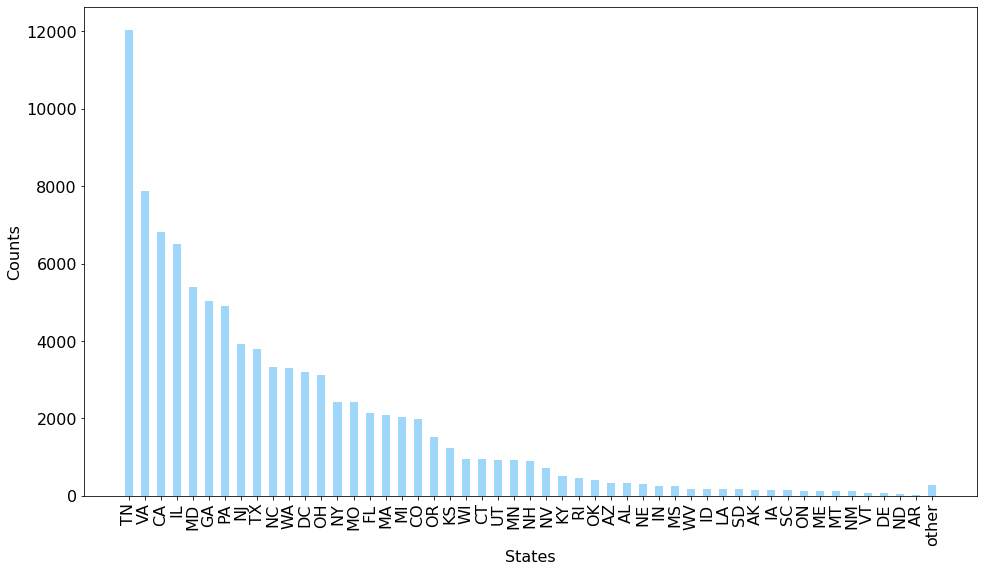

In [35]:
plt.figure(figsize=(16, 9))
plt.bar(top_states['index'], top_states['Merch state'], color='lightskyblue', alpha=0.8, width = 0.5)
plt.xticks(rotation = 90, size = 16)
plt.yticks( size = 16)
plt.ylabel('Counts', size = 16)
plt.xlabel('States', size = 16)
#plt.yscale('log')
#plt.title('Number of Transactions in 50 States')
plt.grid(False)
#plt.savefig('state distribution.png', bbox_inches = 'tight')

## Merch zip
### (top 50)

In [39]:
top_zip = pd.DataFrame(data['Merch zip'].value_counts()).reset_index()
top_zip50 = top_zip.sort_values(by='Merch zip', ascending = False)[:50]
top_zip50['index']=top_zip50['index'].astype('str')

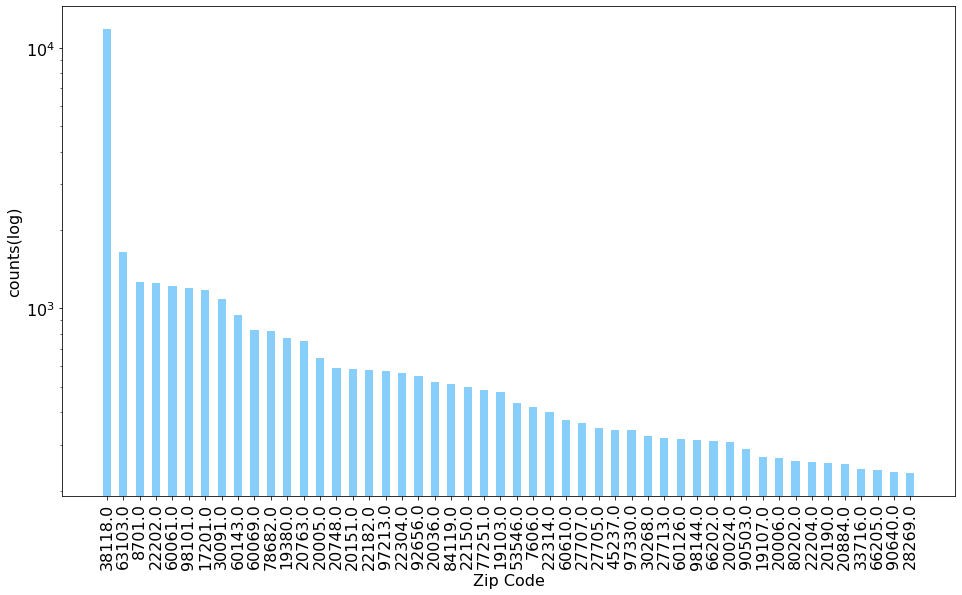

In [40]:
plt.figure(figsize=(16, 9))
plt.bar(top_zip50['index'], top_zip50['Merch zip'], color=['lightskyblue'], width=0.5)
plt.xticks(top_zip50['index'], rotation=90, size=16)
plt.yticks(size = 16)
#plt.grid(False)
plt.xlabel('Zip Code', fontsize=16)
plt.ylabel('counts(log)', size = 16)
plt.yscale('log')
#plt.title("Top 50 Zip Codes of Merchandises in Frequency", fontsize=14)
#plt.savefig('distribution by zipcode.png', bbox_inches = 'tight')

# Transtype

In [41]:
data.Transtype = data.Transtype.astype('category')
transtype = pd.DataFrame(data.Transtype.value_counts()).reset_index()

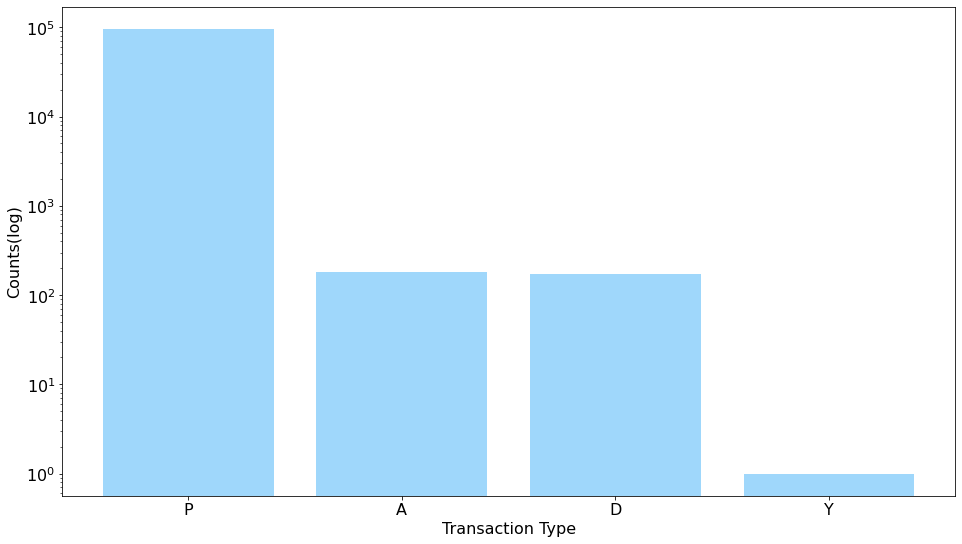

In [42]:
plt.figure(figsize=(16, 9))
plt.bar(transtype['index'], transtype.Transtype, color='lightskyblue', alpha=0.8)
plt.xticks(['P', 'D', 'A', 'Y'], size=16)
plt.yticks(size=16)
plt.ylabel('Counts(log)', size=16)
plt.xlabel('Transaction Type', size=16)
plt.yscale('log')
#plt.title('Distribution of Transaction Types in 2010', size=14)
plt.grid(False)
#plt.savefig('type distribution.png', bbox_inches = 'tight')

## Amount

In [44]:
amount = []

for i in data.Amount:
    if i > 10000:
        amount.append('> 10000')
        
    elif 5000<i<=10000:
        amount.append('5000~10000')
        
    elif 1000<i<=5000:
        amount.append('1000~5000')
    
    elif 800<i<=1000:
        amount.append('800~1000')
        
    elif 600<i<=800:
        amount.append('600~800')
        
    elif 400<i<=600:
        amount.append('400~600')
        
    elif 200<i<=400:
        amount.append('200~400')
        
    else:
        amount.append('< 200')

In [47]:
data['amount'] = amount
amount_counts= pd.DataFrame(data['amount'].value_counts()).reset_index()

In [48]:
amount_counts['index'] = amount_counts['index'].astype('category')
amount_counts['index'] = amount_counts['index'].cat.reorder_categories(['< 200', '200~400', '400~600', '600~800', '800~1000', '1000~5000','5000~10000', '> 10000'])
amount_counts = amount_counts.sort_values(by = 'index')

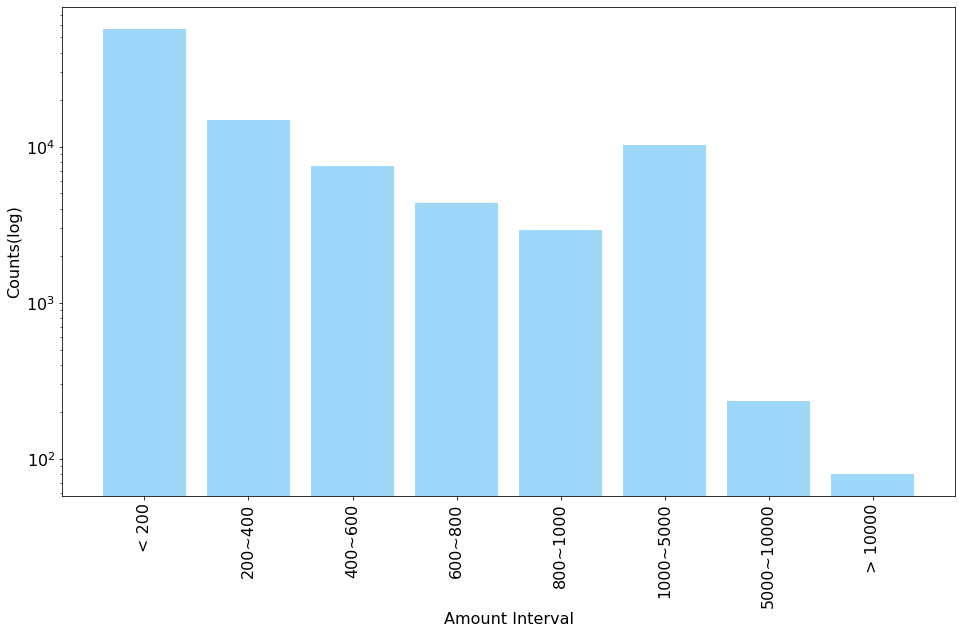

In [50]:
plt.figure(figsize = (16, 9))
plt.bar(amount_counts['index'], amount_counts['amount'], color='lightskyblue', alpha=0.8)
plt.xticks(['< 200', '200~400', '400~600', '600~800', '800~1000', '1000~5000',
       '5000~10000', '> 10000'], rotation = 90, size = 16)
plt.yticks(size= 16)
plt.ylabel('Counts(log)', size=16)
plt.xlabel('Amount Interval', size=16)
plt.yscale('log')
#plt.title('Distribution of Transaction Amount in 2010', size=14)
#plt.savefig('amount distribution.png', bbox_inches='tight')

## Fraud

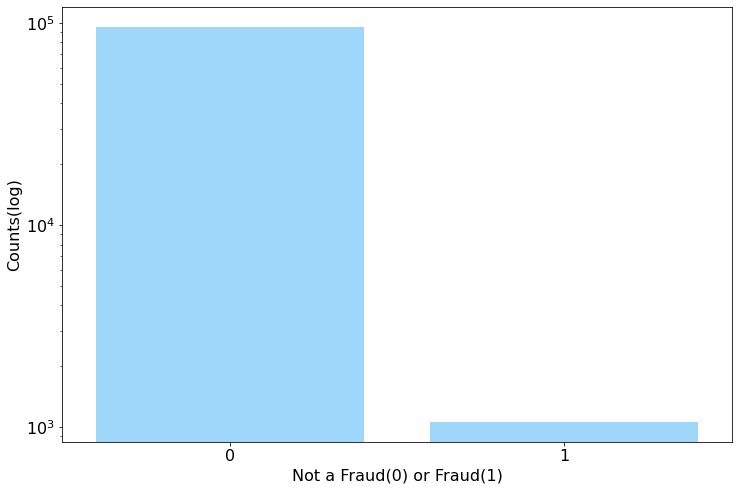

In [43]:
fraud = pd.DataFrame(data.Fraud.value_counts()).reset_index()
plt.figure(figsize=(12, 8))
plt.bar(fraud['index'], fraud.Fraud, color='lightskyblue', alpha=0.8)
plt.xticks([0, 1], size = 16)
plt.yticks(size = 16)
plt.xlim([-0.5, 1.5])
plt.ylabel('Counts(log)', size = 16)
plt.xlabel('Not a Fraud(0) or Fraud(1)', size=16)
plt.yscale('log')
#plt.title('Number of Fraud in 2010', size=14)
#plt.grid()
#plt.savefig('fraud distribution.png', bbox_inches = 'tight')